## Do Spacemix accounting for LD!
1. Make PED file to do pruning using PLINK
2. 

In [2]:
import projmodules as pm
import HOdata

alldat=HOdata.allHOiwant


baseDir = "/mnt/solexa/mel_yang/bronzeage/data/"
fh="ind_A_v13_TBH5"
newname = 'ALLHOANC'
pm.indtoignore(alldat, baseDir+fh+'.ind', baseDir+fh+'.'+newname+'.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname+'.ped','PED',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.'+newname)


'Made par file for convertf!'

In [10]:
%%bash
pd="/mnt/solexa/mel_yang/bronzeage/data/" #NEED TO MOVE TO admixture/ FIRST
fh="ind_A_v13_TBH5.ALLHOANC"
idp=".50_5_0.2"
#cp ${pd}${fh}.ped.geno ${pd}${fh}.ped
#cp ${pd}${fh}.ped.ind ${pd}${fh}.pedind
#cut -c1-41 ${pd}${fh}.ped.snp > ${pd}${fh}.map

#echo "plink --noweb --file ${pd}${fh} --make-bed --out ${pd}${fh} --geno 0.999"
echo "plink --noweb --bfile ${pd}${fh} --indep-pairwise 50 5 0.2 --out ${pd}plink${idp} --allow-no-sex"
#cp ${pd}plink${idp}.prune.out ${fh}_pruned_50_5_0.5.snp #and convertf to remove bad SNPs


#Extra
##plink --noweb --bfile ${pd}${fh} --indep-pairwise 50 5 0.2  ##Prune dataset, using 50 SNP windows, step 5 SNPs, remove SNP pairs with R^2>0.2
##mv plink* .
#plink --noweb --bfile ${pd}${fh} --indep-pairwise 200 25 0.5 --out ${pd}plink${idp}
#plink --noweb --bfile ${pd}${fh} --extract ${pd}plink${idp}.prune.in --make-bed --out ${pd}${fh}_pruned${idp}  ##Keep set of untargeted SNPs from above

plink --noweb --bfile /mnt/solexa/mel_yang/bronzeage/data/ind_A_v13_TBH5.ALLHOANC --indep-pairwise 50 5 0.2 --out /mnt/solexa/mel_yang/bronzeage/data/plink.50_5_0.2 --allow-no-sex


## Make file of bad SNPs (the ones in LD)
1. Take the plink.50_5_0.2.prune.out file, find location in ind_A_v13_TBH5.ALLHOANC.bim, and grab corresponding snp line in ind_A_v13_TBH5.ALLHOANC.ped.snp => ind_A_v13_TBH5.ALLHOANC_prunedout_50_5_0.5.snp
2. Put ind_A_v13_TBH5.ALLHOANC_prunedout_50_5_0.5.snp as badsnpfile in convertf

In [12]:
pd="/mnt/solexa/mel_yang/bronzeage/data/"
fh="ind_A_v13_TBH5"
subset="ALLHOANC"
prune="50_5_0.2"

prunefile=open("%splink.%s.prune.out" % (pd,prune))
mylst=[line.strip() for line in prunefile]
prunefile.close()

bimfile=open("%s%s.%s.bim" % (pd,fh,subset))
myindices=[ind for ind,line in enumerate(bimfile) if line.split()[1] in mylst]
bimfile.close()

snpfile=open("%s%s.%s.ped.snp" % (pd,fh,subset),'r')
newsnpfile=open("%s%s.%s_prunedout_%s.snp" % (pd,fh,subset,prune),'w')
for ind,line in enumerate(snpfile):
    if ind not in myindices: continue
    newsnpfile.write(line)
snpfile.close()
newsnpfile.close()

In [20]:
##Make file of indices

pd="/mnt/solexa/mel_yang/bronzeage/data/"
fh="ind_A_v13_TBH5"
subset="ALLHOANC"
prune="50_5_0.2"

prunefile=open("%splink.%s.prune.in" % (pd,prune))
mylst=[line.strip() for line in prunefile]
prunefile.close()


print "Writing to file!"
bimfile=open("%s%s.%s.bim" % (pd,fh,subset))
newsnpindfile=open("%s%s.%s_prunedin_%s.snpind" % (pd,fh,subset,prune),'w')
for ind,line in enumerate(bimfile):
    if line.split()[1] in mylst: newsnpindfile.write("%i\n" % ind)
bimfile.close()
newsnpindfile.close()


Writing to file!


In [17]:
import projmodules as pm
import HOdata

alldat=HOdata.allHOiwant


baseDir = "/mnt/solexa/mel_yang/bronzeage/data/"
fh="ind_A_v13_TBH5"
newname = 'ALLHOANC_pruned_50_5_0.2'
pm.indtoignore(alldat, baseDir+fh+'.ind', baseDir+fh+'.ALLHOANC.ind')
pm.convertf_par(baseDir+fh,baseDir+fh+'.'+newname,'EIGENSTRAT',baseDir+
                'CONVERTF.'+fh+'.'+newname+'.par',indfilename=baseDir+fh+'.ALLHOANC',
               badsnpfile=baseDir+fh+".ALLHOANC_prunedout_50_5_0.2.snp")


'Made par file for convertf!'

In [3]:
#%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/runspacemixgenR.py
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5"
GPSCAT="wGPS"
subsets=["pruned_50_5_0.2_EAS+ANC_all","pruned_50_5_0.2_EAS+ANC_rd",
         "pruned_50_5_0.2_subEA+ANC_all","pruned_50_5_0.2_subEA+ANC_rd"]
for SUBSET in subsets:
    for SOURCE in ["target","source_and_target"]:
        print "Rscript spacemixgen.R %s %s %s %s %s > %s.%s.%s.%s.log &" % (MYPD,FH,SUBSET,GPSCAT,SOURCE,FH,SUBSET,GPSCAT,SOURCE)


Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_EAS+ANC_all wGPS target > ind_A_v13_TBH5.pruned_50_5_0.2_EAS+ANC_all.wGPS.target.log &
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_EAS+ANC_all wGPS source_and_target > ind_A_v13_TBH5.pruned_50_5_0.2_EAS+ANC_all.wGPS.source_and_target.log &
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_EAS+ANC_rd wGPS target > ind_A_v13_TBH5.pruned_50_5_0.2_EAS+ANC_rd.wGPS.target.log &
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_EAS+ANC_rd wGPS source_and_target > ind_A_v13_TBH5.pruned_50_5_0.2_EAS+ANC_rd.wGPS.source_and_target.log &
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithic/SpaceMix/ ind_A_v13_TBH5 pruned_50_5_0.2_subEA+ANC_all wGPS target > ind_A_v13_TBH5.pruned_50_5_0.2_subEA+ANC_all.wGPS.target.log &
Rscript spacemixgen.R /mnt/solexa/mel_yang/neolithi

In [4]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotMCMC.py
from subprocess import Popen, PIPE
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5.pruned_50_5_0.2"


myinputs=[("pruned_50_5_0.2_subEA+ANC_rd-wGPS-target",571474),
        ("pruned_50_5_0.2_subEA+ANC_rd-wGPS-source_and_target",320288),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-target",415099),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-source_and_target",90015),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-target",492331),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-source_and_target",603340),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-target",360181),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-source_and_target",336282)]

#Rscript ${MYPD}spacemix_MCMCresults.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET}

for SUBSET,RUNNUM in myinputs:
    #print RUNNUM,SUBSET
    mycommand = "Rscript %sspacemix_MCMCresults.R %s %s %i %s" % (MYPD,MYPD,FH,RUNNUM,SUBSET)
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = PIPE)
    varfile.communicate()


Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotMCMC.py


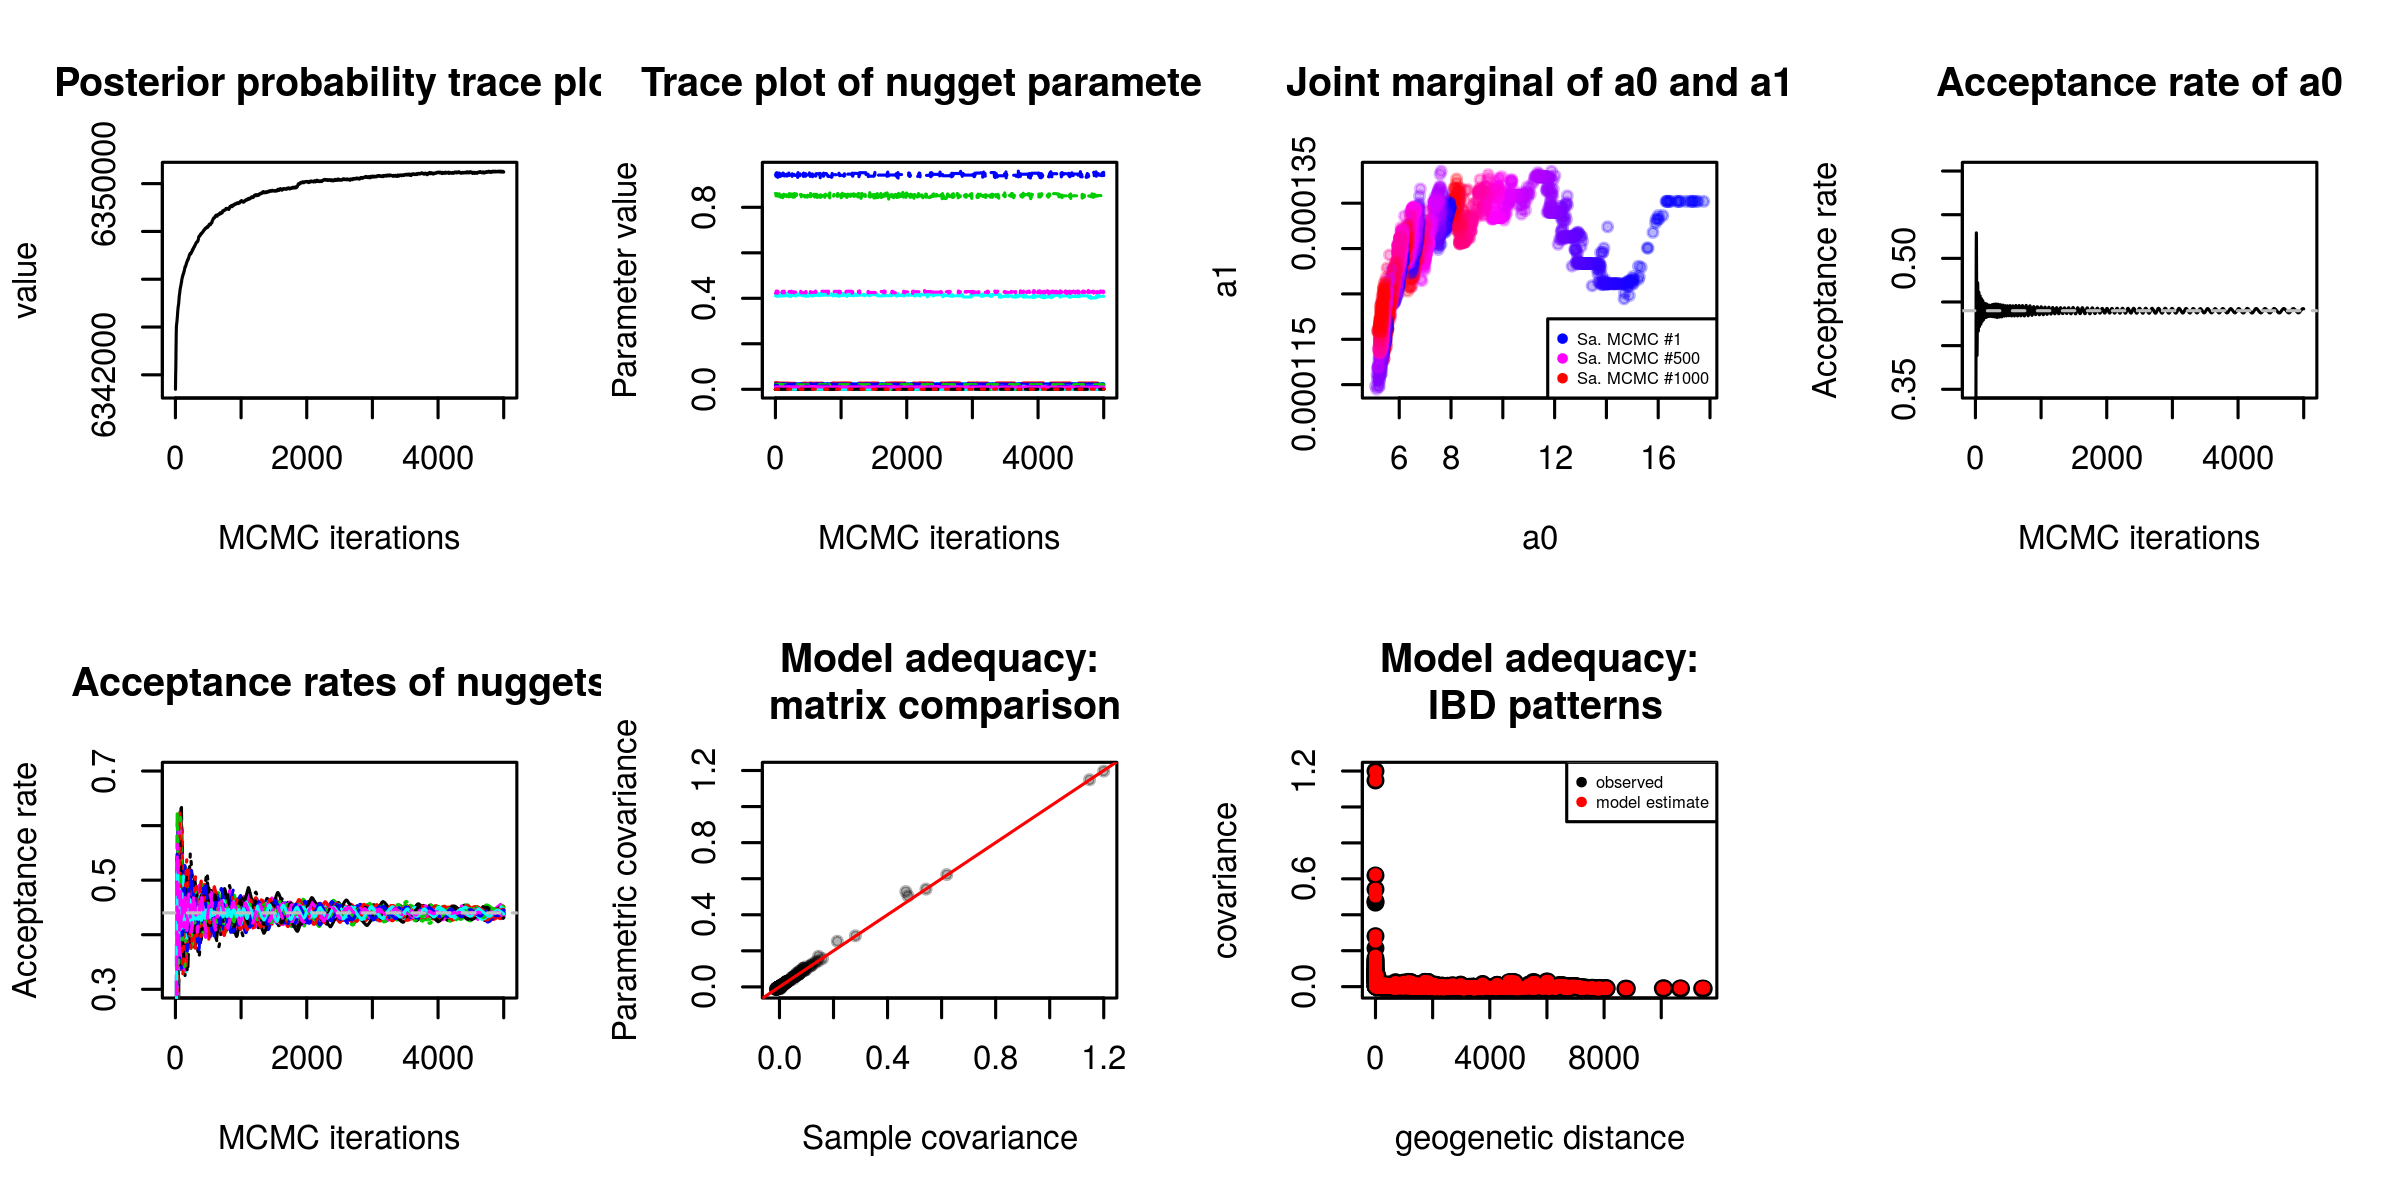

In [13]:
from IPython.display import Image

MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5.pruned_50_5_0.2"

myinputs=[("pruned_50_5_0.2_subEA+ANC_rd-wGPS-target",571474),
        ("pruned_50_5_0.2_subEA+ANC_rd-wGPS-source_and_target",320288),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-target",415099),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-source_and_target",90015),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-target",492331),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-source_and_target",603340),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-target",360181),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-source_and_target",336282)]
SUBSET,RUNNUM=myinputs[7]
Image(filename=MYPD+"imagefiles/"+FH+"_"+str(SUBSET)+'_MCMC.png',width=1000,height=700) 


In [21]:
%%writefile /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotgeogenetic.py
from subprocess import Popen, PIPE
MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5.pruned_50_5_0.2"

myinputs=[("pruned_50_5_0.2_subEA+ANC_rd-wGPS-target",571474),
        ("pruned_50_5_0.2_subEA+ANC_rd-wGPS-source_and_target",320288),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-target",415099),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-source_and_target",90015),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-target",492331),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-source_and_target",603340),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-target",360181),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-source_and_target",336282)]

#Rscript ${MYPD}spacemix_geogenetic.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET} ${SUBSET1} "south" "Dai,Maonan,Zhuang,Gelao"
#Rscript ${MYPD}spacemix_geogenetic.R ${MYPD} ${FH} ${RUNNUM} ${SUBSET} ${SUBSET1} "northeast" "Daur,Hezhen,Oroqen,Ulchi"
pnglabel,pops=("south","Dai,Maonan,Zhuang,Gelao")
#pnglabel,pops=("northeast","Daur,Hezhen,Oroqen,Ulchi")
#pnglabel,pops=("ancient","Linzi,LiangDao,Boisman_MN,Zongri")

for SUBSET,RUNNUM in myinputs:
    SUBSET1='_'.join(SUBSET.split('-')[0].split('_')[4:])
    print SUBSET1
    #print RUNNUM,SUBSET
    mycommand = "Rscript %sspacemix_geogenetic.R %s %s %i %s %s %s %s" % (MYPD,MYPD,FH,RUNNUM,SUBSET,SUBSET1,pnglabel,pops)
    print 'Running command', mycommand

    varfile = Popen(mycommand.split(), stdout = PIPE)
    varfile.communicate()
    #break

Overwriting /mnt/solexa/mel_yang/neolithic/SpaceMix/spacemix_plotgeogenetic.py


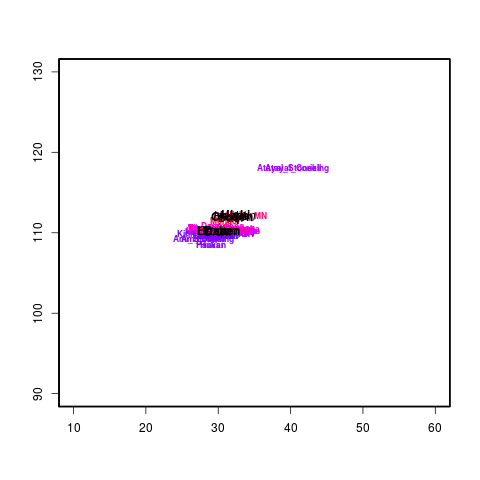

In [41]:
from IPython.display import Image

MYPD="/mnt/solexa/mel_yang/neolithic/SpaceMix/"
FH="ind_A_v13_TBH5.pruned_50_5_0.2"

SUBSET2="northeast"
#SUBSET2="ancient"
#SUBSET2="south"

myinputs=[("pruned_50_5_0.2_subEA+ANC_rd-wGPS-target",571474),
        ("pruned_50_5_0.2_subEA+ANC_rd-wGPS-source_and_target",320288),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-target",415099),
        ("pruned_50_5_0.2_subEA+ANC_all-wGPS-source_and_target",90015),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-target",492331),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-source_and_target",603340),
        ("pruned_50_5_0.2_EAS+ANC_rd-wGPS-target",360181),
        ("pruned_50_5_0.2_EAS+ANC_all-wGPS-source_and_target",336282)]
SUBSET,RUNNUM=myinputs[7]
Image(filename=MYPD+"imagefiles/"+FH+"_"+str(SUBSET)+"_"+str(SUBSET2)+'_geogenetic.png',width=500,height=500) 